In [2]:
%matplotlib nbagg
# import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
# from scipy.optimize import curve_fit

inputFilePath = 'X:\\RIXS\\Ruiz_e18603\\RIXS\\'
outputFilePath = 'X:\\RIXS\\Ruiz_e18603\\ASC\\'

base = 'Cu'
energyTrans = 0.008128 #eV/subpixel

In [3]:
# os.chdir(outputFilePath)

def getdata(scannumber):
    global inputFilePath
    global outputFilePath
    global base
    
    if scannumber < 10:
        filename = base+"_"+"000"+str(scannumber)
    elif scannumber < 100:
        filename = base+"_"+"00"+str(scannumber)
    elif scannumber < 1000:    
        filename = base+"_"+"0"+str(scannumber)
    else:    
        filename = mypath+base+"_"+str(scannumber)

    f1 = h5py.File(inputFilePath+filename+"_d1.h5", 'r')
    f2 = h5py.File(inputFilePath+filename+"_d2.h5", 'r')
    f3 = h5py.File(inputFilePath+filename+"_d3.h5", 'r')

    ccd1 = f1['entry']['analysis']['spectrum'][()]
    ccd2 = f2['entry']['analysis']['spectrum'][()]
    ccd3 = f3['entry']['analysis']['spectrum'][()]
    
    [xdata,data1] = elasticShift(ccd1)
    [_,data2] = elasticShift(ccd2)
    [_,data3] = elasticShift(ccd3)

    tempData = (data1+data2+data3)/3
    data = [xdata,tempData]
    
    # np.savetxt(outputFilePath+filename+'.dat' , np.transpose(data) , #delimiter=", ",
    #          newline="\n" , comments="# " , header="energyloss, counts"
    #           )
    
    return data

def elasticShift(pixelData):

    global energyTrans

    peaks, _ = find_peaks(pixelData,height=100,width=5)
    xdataPixel = np.arange(len(pixelData))
    
    xdataPixel = xdataPixel[(peaks[-1]-2000):(peaks[-1]+200)]
    energyData = pixelData[(peaks[-1]-2000):(peaks[-1]+200)]
    
    xDataEnergy = (xdataPixel - peaks[-1]) * energyTrans * -1

    return [xDataEnergy,energyData]


<IPython.core.display.Javascript object>


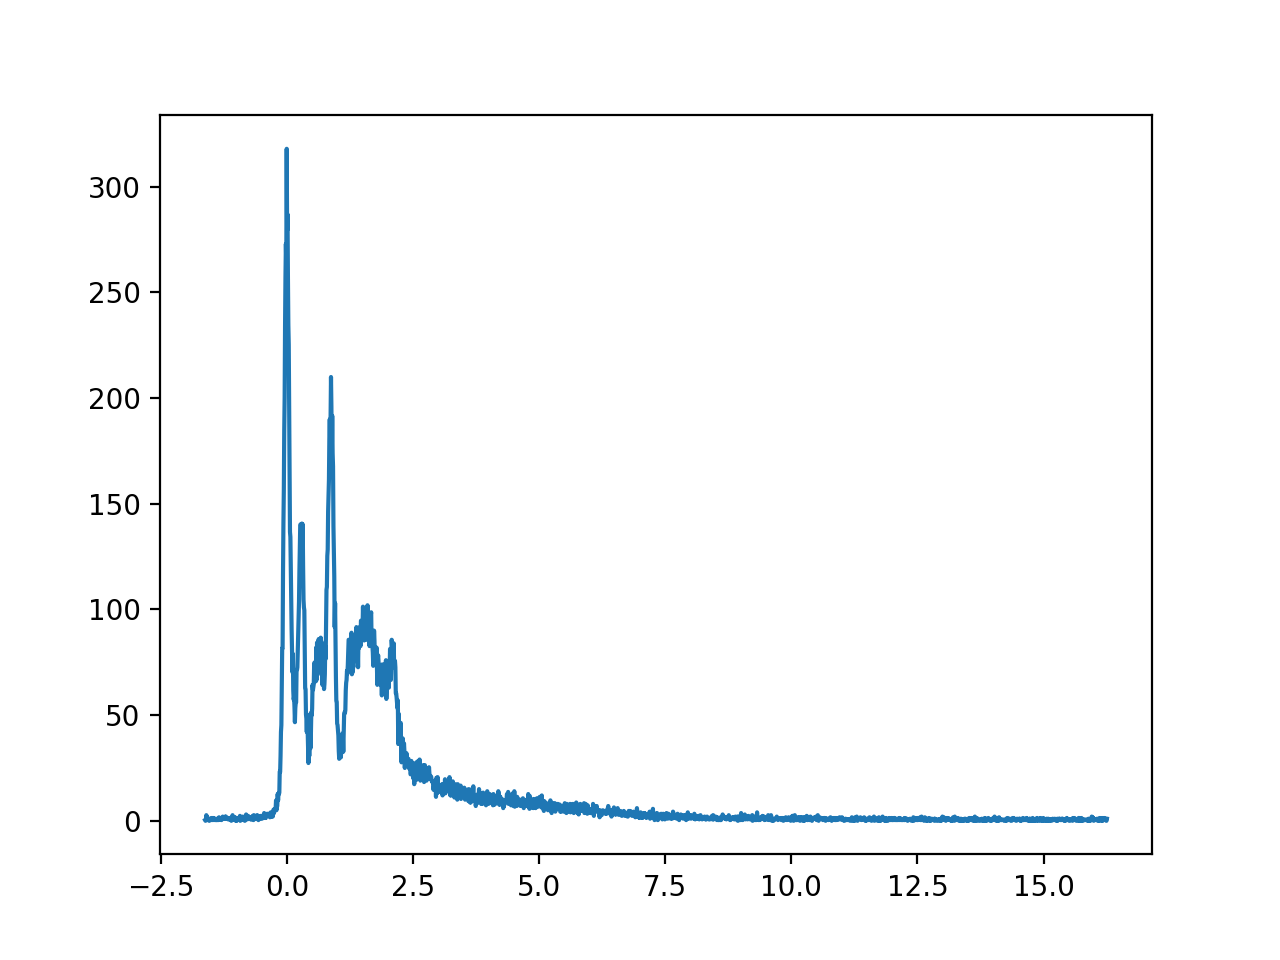

In [5]:
[X,Y]=getdata(837)
plt.plot(X,Y)

<IPython.core.display.Javascript object>


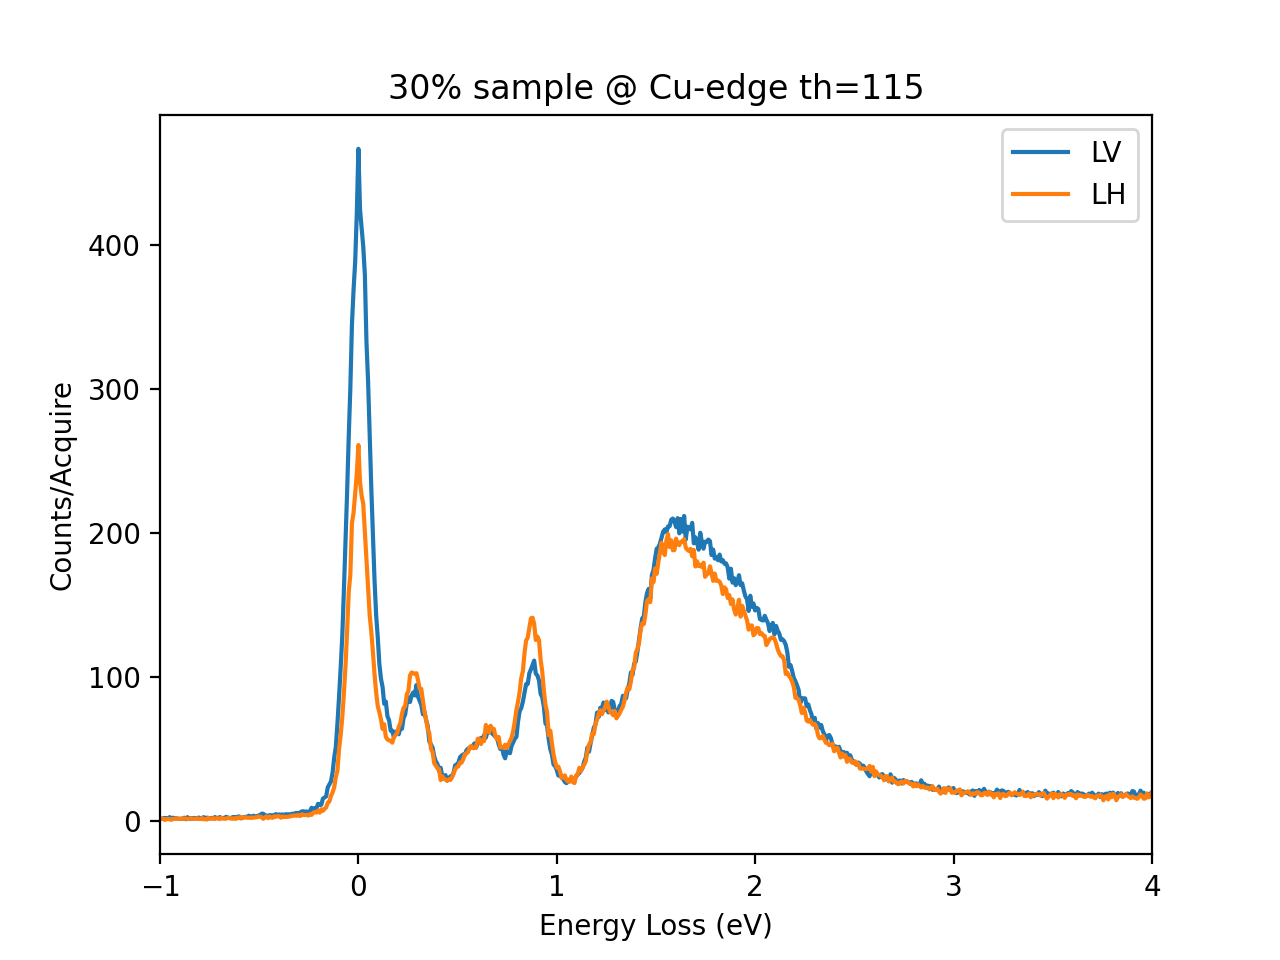

In [6]:
fig = plt.figure() 

#####################################

scans = np.arange(289,293+1)
sumData = np.zeros(2200)

for i,s in enumerate(scans):
    [xData,oneData] = getdata(s)
    sumData = sumData+oneData

aveData = sumData/len(scans)

plt.plot(xData,aveData,  label='LV')

######################################

scans = np.arange(442,446+1)
sumData = np.zeros(2200)

for i,s in enumerate(scans):
    [xData,oneData] = getdata(s)
    sumData = sumData+oneData

aveData = sumData/len(scans)

plt.plot(xData,aveData, label='LH')

######################################

plt.xlabel('Energy Loss (eV)')
plt.ylabel('Counts/Acquire')
plt.xlim([-1,4])
plt.title('30% sample @ Cu-edge th=115')
plt.legend()

<IPython.core.display.Javascript object>


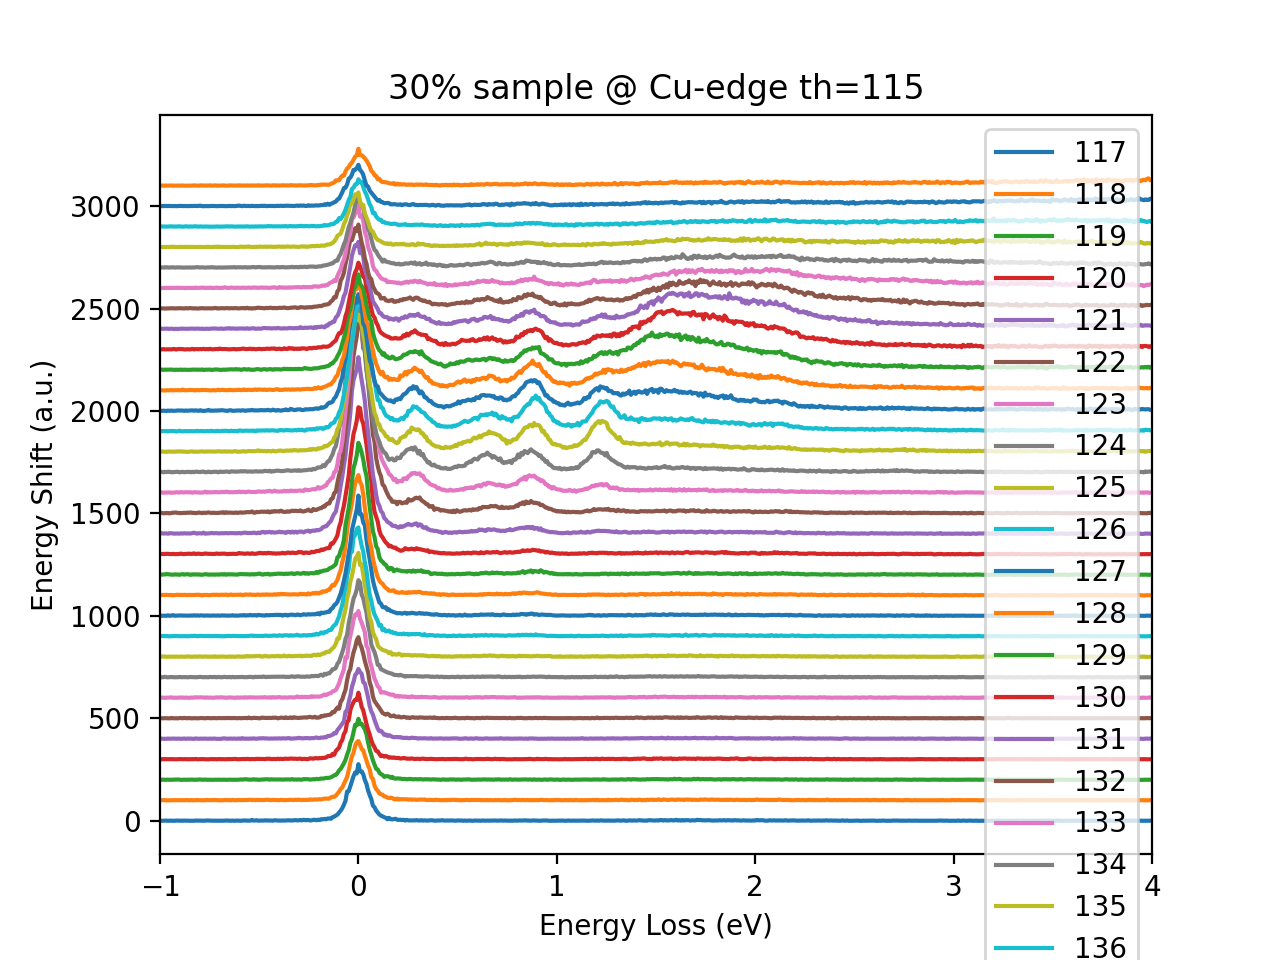

In [7]:
fig = plt.figure()

scans = np.arange(117,148+1)

sumData = np.zeros(2200)

for i,s in enumerate(scans):
    [xData,oneData] = getdata(s)
    plt.plot(xData,oneData+100*i,label=str(s))

plt.xlabel('Energy Loss (eV)')
plt.ylabel('Energy Shift (a.u.)')
plt.xlim([-1,4])
plt.title('30% sample @ Cu-edge th=115')
plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


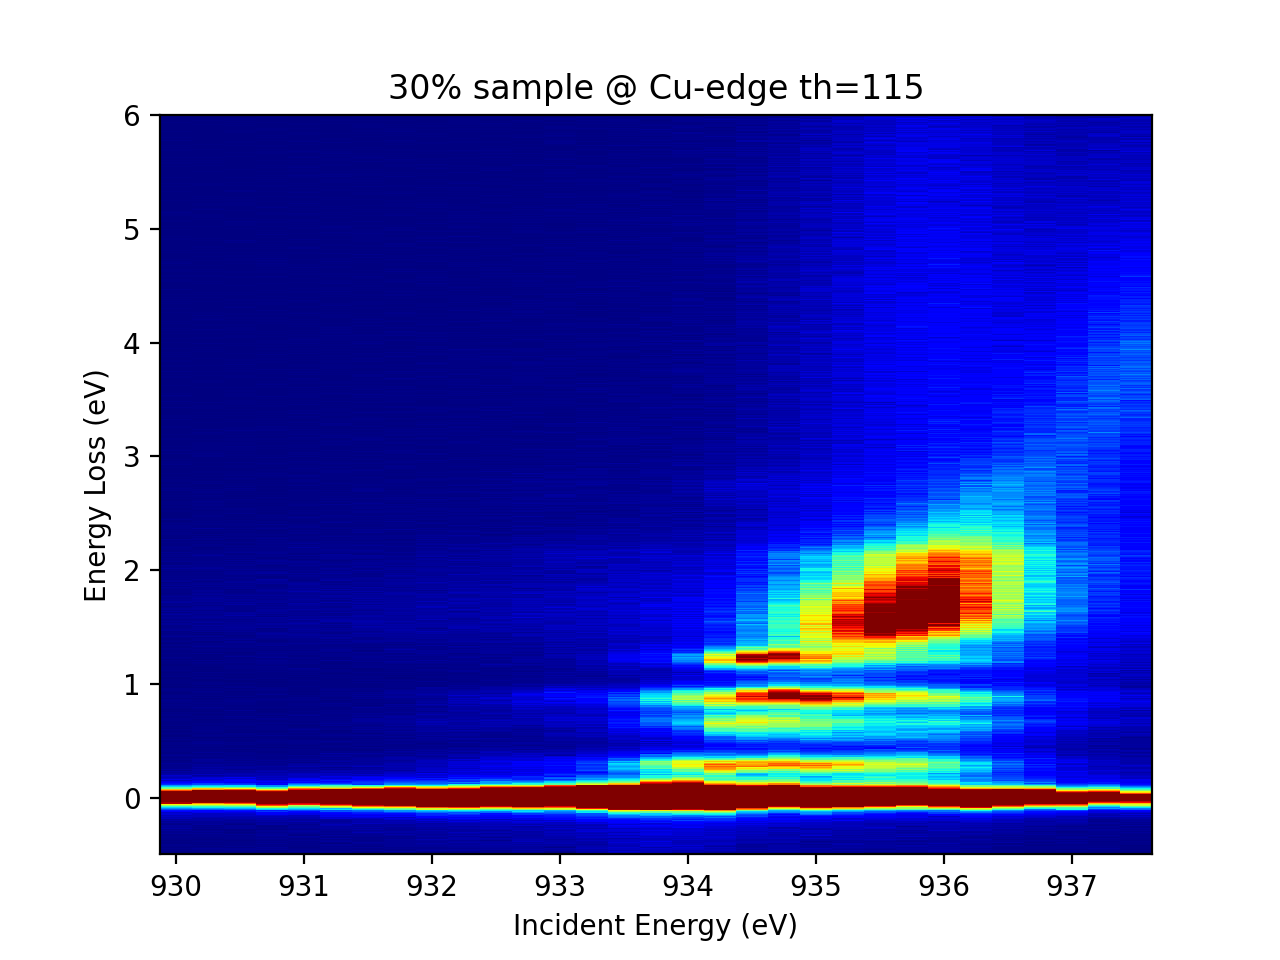

Text(0.5, 1.0, '30% sample @ Cu-edge th=115')

In [8]:
fig = plt.figure()

scans = np.arange(117,147+1)
Ei = np.arange(930,937.5+0.1,0.25)
eiNum = len(scans)

matrixData = np.zeros((2200, eiNum))

for i,s in enumerate(scans):
    [Eloss,oneData] = getdata(s)
    matrixData[:,i] = oneData.T

X,Y = np.meshgrid(Ei,Eloss)

plt.pcolormesh(X,Y,matrixData,shading='auto',cmap='jet',vmax=150)
plt.ylim([-0.5,6])
plt.xlabel('Incident Energy (eV)')
plt.ylabel('Energy Loss (eV)')
plt.title('30% sample @ Cu-edge th=115')